In [1]:
from ml_mmpa import master_functions
import pandas as pd

RDKit WARNING: [11:52:11] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table

### MMPA

In [3]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [4]:
# in the console run: 

# ! ./ml_mmpa/master_mmpa.sh test_data/test_data.csv test

# it will result in new items in the 'out' folder.


Importing libraries
initializing mmpa on: test
first columns should be smiles:  Smiles
Second column should be property:  pMIC
saving property file:  out/test_property.csv
Fragmented record 7408/9999 (74.1%)^C
                                   

In [16]:
# Next we process that output:

output = pd.read_csv('out/index_test_final.csv')

In [17]:
output.head(5)

,compound_structure_A,compound_structure_B,idsmiles_A,idsmiles_B,smirks,common_core,measurement_A,measurement_B,measurement_delta,LHS,RHS
0,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(Cl)cc1,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(OC)cc1,9235,5712,[*:1]c1ccc(Cl)cc1>>[*:1]c1ccc(OC)cc1,[*:1]/C(=C/Nc1cc(Br)c(OC)c(Br)c1)C(=O)OCC,4.00,3.99,-0.01,[*:1]c1ccc(Cl)cc1,[*:1]c1ccc(OC)cc1
1,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
2,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
3,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
4,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1


In [18]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

Initial number of transofrms: 111269 
Number fo transforms disqualified based on length discrepancy: 5974 
Remaining number of transforms: 105295


In [19]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

Number of unique transforms: 8938 
Processing transforms:...
 
1000
2000
3000
4000
5000
6000
7000
8000
done!


In [20]:
output_len_stat.head(5)

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem
0,[*:1]C>>[*:1][H],1052,7.063949,2.938877e-12,0.188386,0.865395,0.026669
1,[*:1]F>>[*:1][H],430,-0.540194,5.893426e-01,-0.027077,1.040596,0.050124
2,[*:1]Cl>>[*:1][H],270,0.700202,4.844038e-01,0.036605,0.860604,0.052278
3,[*:1]C>>[*:1]CC,262,0.518719,6.043943e-01,0.032357,1.011624,0.062379
4,[*:1]OC>>[*:1][H],239,0.483007,6.295327e-01,0.022292,0.714981,0.046152


In [21]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
Output is the significant transforms sorted by measurement delta

This is a great output to consider, but we can do one better by turning the transforms into functional groups
'''

mmpa_zero_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=True)

# Add split columns to the dataframe

mmpa_zero_pos = master_functions.split_transition(mmpa_zero_pos, 'smirks')


Number of unique transforms where p-val < 0.05 is 1395
Split between 1395 positive transforms and 0 negative transforms


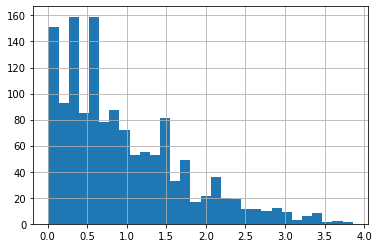

In [22]:
mmpa_zero_pos.measurement_delta.hist(bins=30)

In [23]:
mmpa_zero_pos.head(5)

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem,LHS,RHS
0,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@H](N)C1,2,14.405218,4.784480e-03,3.856667,0.463717,0.267727,[*:1]N1CCC2NC(=O)OC2C1,[*:1]N1CC[C@H](N)C1
1,[*:1]CC1CN([*:2])CC/C1=N\OC>>[*:1][C@H]1CCN([*...,2,8.241833,1.440420e-02,3.656667,0.768462,0.443672,[*:1]CC1CN([*:2])CC/C1=N\OC,[*:1][C@H]1CCN([*:2])C1
2,[*:1]/C(N)=N\OC>>[*:1]CN,11,22.028236,1.891645e-10,3.614167,0.568354,0.164070,[*:1]/C(N)=N\OC,[*:1]CN
3,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@@H](N)C1,2,13.172619,5.713748e-03,3.526667,0.463717,0.267727,[*:1]N1CCC2NC(=O)OC2C1,[*:1]N1CC[C@@H](N)C1
4,[*:1]/C(N)=N\OC>>[*:1]N,6,9.227650,9.142470e-05,3.455714,0.990822,0.374496,[*:1]/C(N)=N\OC,[*:1]N


In [24]:
features_all_neg, l_feats_neg, r_feats_neg = master_functions.calculate_fractions_mk4(mmpa_zero_pos)


  0%|          | 0/1395 [00:00<?, ?it/s]

Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


100%|██████████| 1395/1395 [00:04<00:00, 310.97it/s]


In [25]:
features_all_neg

,aniline,arene,azaarene,azaarene oxide,benzene ring,heteroarene,phenol,alkene,alkyne,alkynylide,...,thiocarbonyl,thiocarboxamide,thiocyanate,thioester,thiol,thiourea,xanthate ester,thiophene,smirks,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@H](N)C1,3.85667
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]CC1CN([*:2])CC/C1=N\OC>>[*:1][C@H]1CCN([*...,3.65667
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C(N)=N\OC>>[*:1]CN,3.61417
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@@H](N)C1,3.52667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C(N)=N\OC>>[*:1]N,3.45571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]N1CCc2ccccc21>>[*:1]N1CCc2ccccc2C1,0.01
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]Nc1ccc([*:2])cc1>>[*:1]Nc1ccc(C)c([*:2])c1,0.01
1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]c1ccc(F)cc1F>>[*:1]c1ccccc1OCC,0.01
1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]Nc1ccc(F)cc1C>>[*:1]Nc1ccccc1OCC,0.01


In [26]:
features_2_all_neg, l_feats_2_neg, r_feats_2_neg = master_functions.calculate_fractions_mk5(mmpa_zero_pos)


NameError: name 'os' is not defined